In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data0 = pd.read_csv("5.urldata.csv")
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
data0.shape
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

<ipython-input-5-01ca729450cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


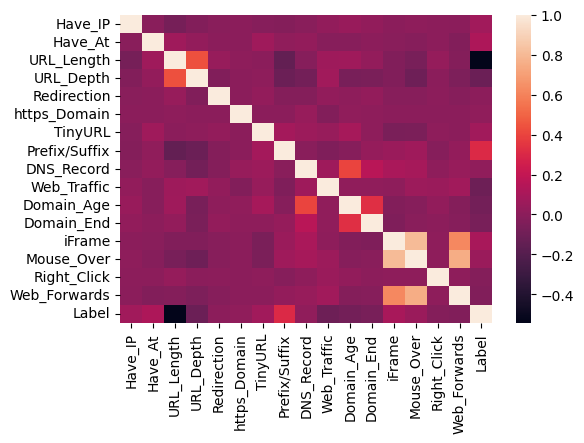

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data= data0.drop(['Domain'], axis=1).copy()

In [ ]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,4,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,3,0,0,0,0,0,0,0,1,0,0,1,1,1
3,0,1,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,2,0,0,0,1,0,1,0,0,0,0,1,0,1


In [ ]:
y=data['Label']
X=data.drop('Label', axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

ML_Model = []
acc_train = []
acc_test = []
precision_test = []
recall_test = []
f1_test = []
confusion_matrices = []

def storeResults(model, a, b, precision, recall, f1, cm):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    precision_test.append(round(precision, 3))
    recall_test.append(round(recall, 3))
    f1_test.append(round(f1, 3))
    confusion_matrices.append(cm)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)
precision_tree = precision_score(y_test, y_test_tree)
recall_tree = recall_score(y_test, y_test_tree)
f1_tree = f1_score(y_test, y_test_tree)
cm_tree = confusion_matrix(y_test, y_test_tree)

print("Decision Tree: Accuracy for training data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy for testing data: {:.3f}".format(acc_test_tree))
print("Decision Tree: Precision: {:.3f}".format(precision_tree))
print("Decision Tree: Recall: {:.3f}".format(recall_tree))
print("Decision Tree: F1 Score: {:.3f}".format(f1_tree))
print("Decision Tree: Confusion Matrix:\n", cm_tree)

# Store the results
storeResults("Decision Tree", acc_train_tree, acc_test_tree, precision_tree, recall_tree, f1_tree, cm_tree)


Decision Tree: Accuracy for training data: 0.814
Decision Tree: Accuracy for testing data: 0.800
Decision Tree: Precision: 0.951
Decision Tree: Recall: 0.638
Decision Tree: F1 Score: 0.764
Decision Tree: Confusion Matrix:
 [[956  33]
 [366 645]]


In [ ]:
import pandas as pd

# Assuming you have the following variables:
# tree.feature_importances_: The feature importances from your decision tree model
# X_train.columns: The column names of your feature matrix (X_train)

# Create a DataFrame to store the feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentages
total_importance = feature_importance_df['Importance'].sum()
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / total_importance) * 100

# Display the tabular data
print(feature_importance_df)


          Feature  Importance  Percentage
2      URL_Length    0.621788   62.178767
7   Prefix/Suffix    0.182785   18.278504
3       URL_Depth    0.092602    9.260219
1         Have_At    0.036427    3.642741
9     Web_Traffic    0.029378    2.937784
12         iFrame    0.029199    2.919910
4     Redirection    0.007371    0.737058
10     Domain_Age    0.000450    0.045018
0         Have_IP    0.000000    0.000000
5    https_Domain    0.000000    0.000000
6         TinyURL    0.000000    0.000000
8      DNS_Record    0.000000    0.000000
11     Domain_End    0.000000    0.000000
13     Mouse_Over    0.000000    0.000000
14    Right_Click    0.000000    0.000000
15   Web_Forwards    0.000000    0.000000


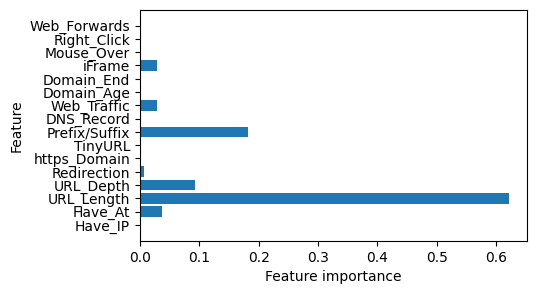

In [ ]:
plt.figure(figsize=(5,3))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
guass= GaussianNB()
guass.fit(X_train, y_train)

y_test_guass = guass.predict(X_test)
y_train_guass = guass.predict(X_train)
acc_train_guass = accuracy_score(y_train, y_train_guass)
acc_test_guass = accuracy_score(y_test, y_test_guass)
precision_guass = precision_score(y_test, y_test_guass)
recall_guass = recall_score(y_test, y_test_guass)
f1_guass = f1_score(y_test, y_test_guass)
cm_guass = confusion_matrix(y_test, y_test_guass)

print("Naive Bayes: Accuracy for training data: {:.3f}".format(acc_train_guass))
print("Naive Bayes: Accuracy for testing data: {:.3f}".format(acc_test_guass))
print("Naive Bayes: Precision: {:.3f}".format(precision_guass))
print("Naive Bayes: Recall: {:.3f}".format(recall_guass))
print("Naive Bayes: F1 Score: {:.3f}".format(f1_guass))
print("Naive Bayes: Confusion Matrix:\n", cm_guass)

# Store the results
storeResults("Naive Bayes", acc_train_guass, acc_test_guass, precision_guass, recall_guass, f1_guass, cm_guass)


Naive Bayes: Accuracy for training data: 0.792
Naive Bayes: Accuracy for testing data: 0.790
Naive Bayes: Precision: 0.977
Naive Bayes: Recall: 0.598
Naive Bayes: F1 Score: 0.742
Naive Bayes: Confusion Matrix:
 [[975  14]
 [406 605]]


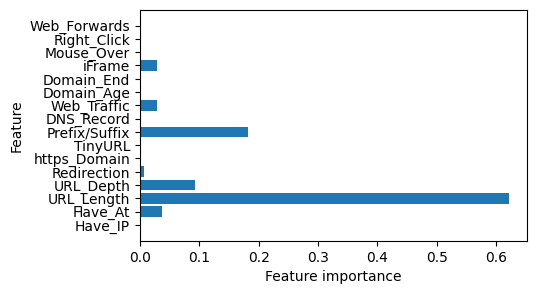

In [ ]:
plt.figure(figsize=(5,3))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)

y_test_logic = logic.predict(X_test)
y_train_logic = logic.predict(X_train)
acc_train_logic = accuracy_score(y_train, y_train_logic)
acc_test_logic = accuracy_score(y_test, y_test_logic)
precision_logic = precision_score(y_test, y_test_logic)
recall_logic = recall_score(y_test, y_test_logic)
f1_logic = f1_score(y_test, y_test_logic)
cm_logic = confusion_matrix(y_test, y_test_logic)

print("Logical Regression: Accuracy for training data: {:.3f}".format(acc_train_logic))
print("Logical Regression: Accuracy for testing data: {:.3f}".format(acc_test_logic))
print("Logical Regression: Precision: {:.3f}".format(precision_logic))
print("Logical Regression: Recall: {:.3f}".format(recall_logic))
print("Logical Regression: F1 Score: {:.3f}".format(f1_logic))
print("Logical Regression: Confusion Matrix:\n", cm_logic)

# Store the results
storeResults("Logical Regression", acc_train_logic, acc_test_logic, precision_logic, recall_logic, f1_logic, cm_logic)


Logical Regression: Accuracy for training data: 0.807
Logical Regression: Accuracy for testing data: 0.796
Logical Regression: Precision: 0.911
Logical Regression: Recall: 0.662
Logical Regression: F1 Score: 0.767
Logical Regression: Confusion Matrix:
 [[924  65]
 [342 669]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


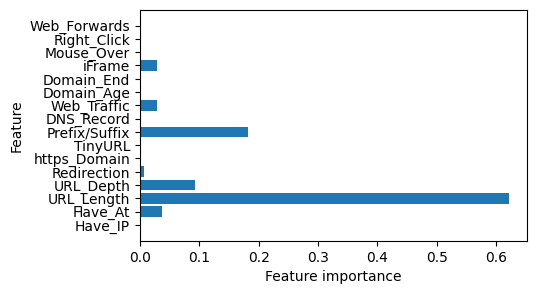

In [ ]:
plt.figure(figsize=(5,3))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
acc_train_knn = accuracy_score(y_train, y_train_knn)
acc_test_knn = accuracy_score(y_test, y_test_knn)
precision_knn = precision_score(y_test, y_test_knn)
recall_knn = recall_score(y_test, y_test_knn)
f1_knn = f1_score(y_test, y_test_knn)
cm_knn = confusion_matrix(y_test, y_test_knn)

print("knn: Accuracy for training data: {:.3f}".format(acc_train_knn))
print("knn: Accuracy for testing data: {:.3f}".format(acc_test_knn))
print("knn: Precision: {:.3f}".format(precision_knn))
print("knn: Recall: {:.3f}".format(recall_knn))
print("knn: F1 Score: {:.3f}".format(f1_knn))
print("knn: Confusion Matrix:\n", cm_knn)

# Store the results
storeResults("knn", acc_train_knn, acc_test_knn, precision_knn, recall_knn, f1_knn, cm_knn)


knn: Accuracy for training data: 0.852
knn: Accuracy for testing data: 0.823
knn: Precision: 0.864
knn: Recall: 0.771
knn: F1 Score: 0.814
knn: Confusion Matrix:
 [[866 123]
 [232 779]]


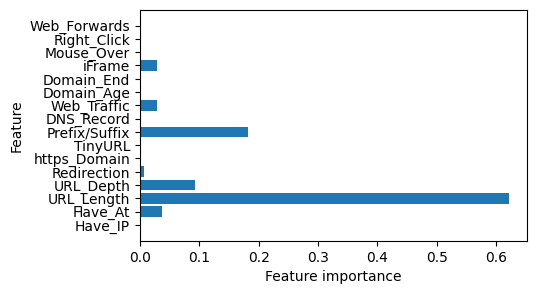

In [ ]:
plt.figure(figsize=(5,3))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Assuming you have stored results in the lists as described in your code

for i in range(len(ML_Model)):
    print(f"Model: {ML_Model[i]}")
    print(f"Accuracy (Train): {acc_train[i]}")
    print(f"Accuracy (Test): {acc_test[i]}")
    print(f"Precision: {precision_test[i]}")
    print(f"Recall: {recall_test[i]}")
    print(f"F1 Score: {f1_test[i]}")
    print(f"Confusion Matrix:\n{confusion_matrices[i]}\n")


Model: Decision Tree
Accuracy (Train): 0.814
Accuracy (Test): 0.8
Precision: 0.951
Recall: 0.638
F1 Score: 0.764
Confusion Matrix:
[[956  33]
 [366 645]]

Model: Naive Bayes
Accuracy (Train): 0.792
Accuracy (Test): 0.79
Precision: 0.977
Recall: 0.598
F1 Score: 0.742
Confusion Matrix:
[[975  14]
 [406 605]]

Model: Logical Regression
Accuracy (Train): 0.807
Accuracy (Test): 0.796
Precision: 0.911
Recall: 0.662
F1 Score: 0.767
Confusion Matrix:
[[924  65]
 [342 669]]

Model: knn
Accuracy (Train): 0.852
Accuracy (Test): 0.822
Precision: 0.864
Recall: 0.771
F1 Score: 0.814
Confusion Matrix:
[[866 123]
 [232 779]]

